In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\dataset\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
del df['RowNumber']
del df['CustomerId']
del df['Surname']

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


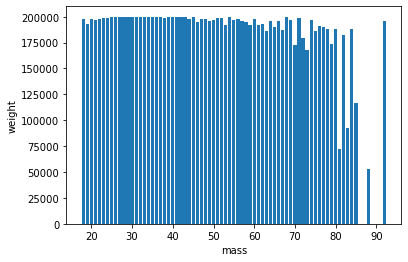

In [10]:
age = df['Age']
salary = df['EstimatedSalary']
plt.bar(age,salary)
plt.xlabel("mass")
plt.ylabel("weight")
plt.show()

In [11]:
df = pd.get_dummies(data=df , columns= ['Gender','Geography'])

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [16]:
x = df.loc[:,df.columns!='Exited']
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state=1)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
import tensorflow as tf

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=6 , activation='relu'))
model.add(tf.keras.layers.Dense(units=6 , activation='relu'))
model.add(tf.keras.layers.Dense(units=1 , activation='relu'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 652us/step - loss: 1.4832 - accuracy: 0.7617
Epoch 2/100
250/250 [==============================] - 0s 639us/step - loss: 1.0053 - accuracy: 0.7617
Epoch 3/100
250/250 [==============================] - 0s 633us/step - loss: 0.7403 - accuracy: 0.7832
Epoch 4/100
250/250 [==============================] - 0s 758us/step - loss: 0.5504 - accuracy: 0.7889
Epoch 5/100
250/250 [==============================] - 0s 662us/step - loss: 0.4953 - accuracy: 0.8041
Epoch 6/100
250/250 [==============================] - 0s 539us/step - loss: 0.4775 - accuracy: 0.8075
Epoch 7/100
250/250 [==============================] - 0s 518us/step - loss: 0.4684 - accuracy: 0.8117
Epoch 8/100
250/250 [==============================] - 0s 541us/step - loss: 0.4588 - accuracy: 0.8138
Epoch 9/100
250/250 [==============================] - 0s 537us/step - loss: 0.4505 - accuracy: 0.8158
Epoch 10/100
250/250 [==============================] - 0s 547us/step - l

250/250 [==============================] - 0s 560us/step - loss: 0.3530 - accuracy: 0.8577
Epoch 80/100
250/250 [==============================] - 0s 533us/step - loss: 0.3432 - accuracy: 0.8580
Epoch 81/100
250/250 [==============================] - 0s 509us/step - loss: 0.3420 - accuracy: 0.8593
Epoch 82/100
250/250 [==============================] - 0s 505us/step - loss: 0.3406 - accuracy: 0.8596
Epoch 83/100
250/250 [==============================] - 0s 501us/step - loss: 0.3415 - accuracy: 0.8596
Epoch 84/100
250/250 [==============================] - 0s 546us/step - loss: 0.3414 - accuracy: 0.8591
Epoch 85/100
250/250 [==============================] - 0s 558us/step - loss: 0.3413 - accuracy: 0.8590
Epoch 86/100
250/250 [==============================] - 0s 549us/step - loss: 0.3416 - accuracy: 0.8587
Epoch 87/100
250/250 [==============================] - 0s 577us/step - loss: 0.3416 - accuracy: 0.8599
Epoch 88/100
250/250 [==============================] - 0s 539us/step - loss:

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (32, 6)                   84        
_________________________________________________________________
dense_11 (Dense)             (32, 6)                   42        
_________________________________________________________________
dense_12 (Dense)             (32, 1)                   7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________




Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [38]:
print(model.predict(sc.transform([
[950, 49, 2, 0.0, 0, 1, 1, 79084.1, 0, 1, 0, 1, 0]
])) > 0.5)

[[ True]]


In [33]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [35]:
[950,49,2,0.00,0,1,1,79084.10,0,1,0,1,0]

[950, 49, 2, 0.0, 0, 1, 1, 79084.1, 0, 1, 0, 1, 0]